In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import spacy
import re
import nltk
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
import string

In [2]:
import nltk
from nltk import word_tokenize,sent_tokenize

In [3]:
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Embedding 
from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalMaxPool1D
from keras.layers import LSTM, Bidirectional

In [4]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers

In [5]:
from tensorflow.keras.layers import TextVectorization

## Bags of words embedding

In [6]:
dt = pd.read_csv('train.csv',encoding ='utf-8')

In [7]:
# english data set
df_en = dt.loc[dt['lang_abv'] == 'en']
df_en

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
7,fdcd1bd867,From Cockpit Country to St. Ann's Bay,From St. Ann's Bay to Cockpit Country.,en,English,2
8,7cfb3d272c,"Look, it's your skin, but you're going to be i...",The boss will fire you if he sees you slacking...,en,English,1
...,...,...,...,...,...,...
12115,2b78e2a914,The results of even the most well designed epi...,All studies have the same amount of uncertaint...,en,English,2
12116,7e9943d152,But there are two kinds of the pleasure of do...,But there are two kinds of the pleasure of doi...,en,English,0
12117,5085923e6c,The important thing is to realize that it's wa...,"It cannot be moved, now or ever.",en,English,2
12118,fc8e2fd1fe,At the west end is a detailed model of the who...,The model temple complex is at the east end.,en,English,2


In [8]:
#english x
x_p = df_en.premise.values
x_h =  df_en.hypothesis.values
#english y 
y = df_en.label.values
# split train and test
x_train_p, x_test_p,x_train_h,x_test_h, y_train, y_test = train_test_split(x_p,x_h, y, test_size=0.3, random_state=100)

In [9]:
x_train = x_train_p +' '+x_train_h
x_train

array(['Crosethe Rue de Rivoli to the Palais-Royal, built for Car?\xaddi?\xadnal Richelieu as his Paris residence in 1639, and originally named Palais-Cardinal. Cardinal Richelieu was a wealthy man who worked diligently for the Catholic church.',
       "If I had chosen to be an actor, I should have been the greatest actor living!  I chose to become an actor, but I wasn't very good at it. ",
       'Poor Dave, she said. She was happy for Dave.', ...,
       'Troyes is also a center for shopping, with two outlet centers selling both French and international designer-name fashions and home accessories. There are three outlet centers in Troyes, all of which sell only French fashions.',
       'Children will enjoy the little steam train that loops around the bay to Le Crotoy in the summer. There is a steam train looping around the bay to Le Crotoy.',
       'They said that (1) agencies need to be able to design their procedures to fit their particular circumstances (e.g. The authors of the

In [10]:
y_train

array([1, 2, 2, ..., 2, 0, 1], dtype=int64)

In [11]:
X_train_tok = [word_tokenize(sentence) for sentence in x_train]
X_train_tok = [[word.lower() for word in s]for s in X_train_tok]
X_train_tok = [[word for word in s if word.isalpha()]for s in X_train_tok]

In [12]:
text = []
for l in X_train_tok:
    for i in l:
        text.append(i)

In [13]:
text = set(text)
text1 =list(text)

In [14]:
# Model constants.
max_features = len(text1)+2
embedding_dim = 128
sequence_length = 100


def custom_slpit(input_data):
    return tf.strings.split(input_data)

vectorize_layer = TextVectorization(
    max_tokens=max_features,
    vocabulary = text1,
    output_mode="int",
    ngrams = None,
    output_sequence_length=sequence_length,
)
#vectorize_layer.adapt(x_train)

In [15]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'puglia',
 'fancifully',
 'disruptions',
 'disturbed',
 'lesson',
 'leathery',
 'elusive',
 'install',
 'candles',
 'niche',
 'giving',
 'years',
 'trouble',
 'effects',
 'se',
 'unconstrained',
 'pray',
 'announcing',
 'surely',
 'gradually',
 'twist',
 'blades',
 'insemination',
 'characters',
 'experts',
 'deposition',
 'acknowledge',
 'fasulye',
 'chloroform',
 'beg',
 'biological',
 'kidder',
 'already',
 'asians',
 'pertaining',
 'neighboring',
 'gifts',
 'grand',
 'deal',
 'actual',
 'italians',
 'pennsylvania',
 'industry',
 'calcutta',
 'recommitted',
 'seattle',
 'perspiration',
 'distributors',
 'outcomes',
 'breath',
 'crashed',
 'imbued',
 'seriously',
 'believe',
 'professional',
 'increasing',
 'cute',
 'rowlett',
 'obscurity',
 'unsure',
 'reached',
 'locations',
 'cloud',
 'dracula',
 'educators',
 'lost',
 'typical',
 'version',
 'second',
 'requester',
 'hud',
 'enlisted',
 'tee',
 'goats',
 'exhort',
 'dinners',
 'reiterating',
 'landing',
 'fingerpr

In [16]:
X_train_p = vectorize_layer(x_train_p)
X_test_p = vectorize_layer(x_test_p)
X_train_h = vectorize_layer(x_train_h)
X_test_h = vectorize_layer(x_test_h)

In [17]:
X_train = np.hstack((X_train_p,X_train_h))
X_test = np.hstack((X_test_p,X_test_h))

In [18]:
X_train.shape

(4809, 200)

In [19]:
# Convert y to OHE 
y_train = to_categorical(y_train, 3)
y_test  = to_categorical(y_test, 3)

In [21]:
# A integer input for vocab indices.
inputs = Input(shape=(200,), dtype="int64")

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
x = Embedding(max_features, embedding_dim)(inputs)
x = Dropout(0.1)(x)

# Conv1D + global max pooling
x = Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = Dense(128, activation="relu")(x)
x = Dropout(0.1)(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
x = layers.Dense(3, activation="softmax", name="predictions")(x)

model = keras.Model(inputs, outputs=x)

# Compile the model with binary crossentropy loss and an adam optimizer.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
cnn = model.fit(X_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
121/121 [==============================] - 6s 45ms/step - loss: 1.1001 - accuracy: 0.3296 - val_loss: 1.0965 - val_accuracy: 0.3680
Epoch 2/3
121/121 [==============================] - 5s 44ms/step - loss: 1.0760 - accuracy: 0.4123 - val_loss: 1.0922 - val_accuracy: 0.3545
Epoch 3/3
121/121 [==============================] - 5s 44ms/step - loss: 0.7404 - accuracy: 0.6914 - val_loss: 1.3904 - val_accuracy: 0.3368


In [23]:
cnn_pred = np.round(model.predict(X_test))

65/65 [==============================] - 1s 8ms/step


In [24]:
print('Accuracy %s' % accuracy_score(y_test, cnn_pred))
print('F1-score %s' % f1_score(y_test, cnn_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn_pred))

Accuracy 0.2678311499272198
F1-score [0.19562955 0.32145685 0.36273115]
Classification report:
              precision    recall  f1-score   support

           0       0.36      0.13      0.20       703
           1       0.34      0.30      0.32       667
           2       0.36      0.37      0.36       691

   micro avg       0.35      0.27      0.30      2061
   macro avg       0.35      0.27      0.29      2061
weighted avg       0.35      0.27      0.29      2061
 samples avg       0.27      0.27      0.27      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
input = Input(shape=(200,), dtype="int64") 
x   =  Embedding(max_features, embedding_dim)(input)
#x   =  Dropout(0.2)(x)
x   =  Conv1D(100, 3, padding='valid',activation='relu', strides=1)(x)
x   =  GlobalMaxPooling1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(32, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

model1 = Model(inputs=input, outputs=x)
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
cnn1 = model1.fit(X_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
121/121 [==============================] - 5s 35ms/step - loss: 1.0989 - accuracy: 0.3434 - val_loss: 1.0987 - val_accuracy: 0.3056
Epoch 2/3
121/121 [==============================] - 4s 35ms/step - loss: 1.0757 - accuracy: 0.4073 - val_loss: 1.1018 - val_accuracy: 0.3306
Epoch 3/3
121/121 [==============================] - 4s 35ms/step - loss: 0.9276 - accuracy: 0.5760 - val_loss: 1.2172 - val_accuracy: 0.3015


In [43]:
cnn_pred1 = np.round(model1.predict(X_test))

65/65 [==============================] - 1s 6ms/step


In [44]:
print('Accuracy %s' % accuracy_score(y_test, cnn_pred1))
print('F1-score %s' % f1_score(y_test, cnn_pred1,average=None,zero_division = 0))
print('Classification report:')
print(classification_report(y_test, cnn_pred1))

Accuracy 0.16302765647743814
F1-score [0.12351029 0.19657349 0.30881017]
Classification report:
              precision    recall  f1-score   support

           0       0.26      0.08      0.12       703
           1       0.25      0.16      0.20       667
           2       0.41      0.25      0.31       691

   micro avg       0.31      0.16      0.21      2061
   macro avg       0.31      0.16      0.21      2061
weighted avg       0.31      0.16      0.21      2061
 samples avg       0.16      0.16      0.16      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LSTM

In [51]:
input = Input(shape=(200, )) 
x   =  Embedding(max_features, embedding_dim)(input)
x   =  LSTM(200, return_sequences=True,name='lstm_layer')(x)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

In [52]:
model_l = Model(inputs=input, outputs=x)
model_l.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [53]:
lstm = model_l.fit(X_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
121/121 [==============================] - 33s 252ms/step - loss: 1.0988 - accuracy: 0.3553 - val_loss: 1.0972 - val_accuracy: 0.3680
Epoch 2/3
121/121 [==============================] - 29s 242ms/step - loss: 1.0819 - accuracy: 0.4011 - val_loss: 1.0699 - val_accuracy: 0.4137
Epoch 3/3
121/121 [==============================] - 32s 261ms/step - loss: 0.9766 - accuracy: 0.5220 - val_loss: 1.1468 - val_accuracy: 0.3971


In [54]:
lstm_pred = np.round(model_l.predict(X_test))

65/65 [==============================] - 6s 72ms/step


In [55]:
print('Accuracy %s' % accuracy_score(y_test, lstm_pred))
print('F1-score %s' % f1_score(y_test, lstm_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm_pred))

Accuracy 0.23532265890344492
F1-score [0.21041667 0.32517483 0.37253057]
Classification report:
              precision    recall  f1-score   support

           0       0.39      0.14      0.21       703
           1       0.39      0.28      0.33       667
           2       0.53      0.29      0.37       691

   micro avg       0.44      0.24      0.31      2061
   macro avg       0.44      0.24      0.30      2061
weighted avg       0.44      0.24      0.30      2061
 samples avg       0.24      0.24      0.24      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
inputs = Input(shape=(200,))
x = Embedding(max_features, embedding_dim)(inputs)
# Add 2 bidirectional LSTMs
x = Bidirectional(LSTM(200, return_sequences=True))(x)
x = Bidirectional(LSTM(64))(x)
#x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
# Add a classifier
x = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
lstm = model.fit(X_train, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
121/121 [==============================] - 113s 897ms/step - loss: 1.0988 - accuracy: 0.3499 - val_loss: 1.0960 - val_accuracy: 0.3680
Epoch 2/10
121/121 [==============================] - 123s 1s/step - loss: 1.0974 - accuracy: 0.3509 - val_loss: 1.1099 - val_accuracy: 0.3285
Epoch 3/10
121/121 [==============================] - 133s 1s/step - loss: 1.0484 - accuracy: 0.4458 - val_loss: 1.2402 - val_accuracy: 0.2609
Epoch 4/10
121/121 [==============================] - 130s 1s/step - loss: 0.9193 - accuracy: 0.5287 - val_loss: 1.3673 - val_accuracy: 0.2089
Epoch 5/10
121/121 [==============================] - 128s 1s/step - loss: 0.8158 - accuracy: 0.5781 - val_loss: 1.8167 - val_accuracy: 0.1923
Epoch 6/10
121/121 [==============================] - 127s 1s/step - loss: 0.7116 - accuracy: 0.6116 - val_loss: 2.2814 - val_accuracy: 0.1965
Epoch 7/10
121/121 [==============================] - 126s 1s/step - loss: 0.6179 - accuracy: 0.6421 - val_loss: 2.9776 - val_accuracy: 0.1

In [22]:
lstm_pred = np.round(model.predict(X_test))

65/65 [==============================] - 14s 200ms/step


In [23]:
print('Accuracy %s' % accuracy_score(y_test, lstm_pred))
print('F1-score %s' % f1_score(y_test, lstm_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm_pred))

Accuracy 0.13537117903930132
F1-score [0.16995448 0.14529148 0.12656365]
Classification report:
              precision    recall  f1-score   support

           0       0.18      0.16      0.17       703
           1       0.18      0.12      0.15       667
           2       0.13      0.12      0.13       691

   micro avg       0.16      0.14      0.15      2061
   macro avg       0.16      0.14      0.15      2061
weighted avg       0.16      0.14      0.15      2061
 samples avg       0.14      0.14      0.14      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


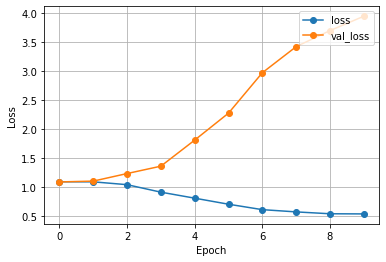

In [24]:
plt.plot(lstm.history['loss'], label='loss', marker = 'o')
plt.plot(lstm.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

## Pre-trained embeddings

In [38]:
!unzip -q glove.6B.zip

^C


In [61]:
voc = vectorize_layer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [62]:
word_index

{'': 0,
 '[UNK]': 1,
 'cheaper': 2,
 'biology': 3,
 'recruits': 4,
 'warheads': 5,
 'cooperation': 6,
 'teacher': 7,
 'defeating': 8,
 'name': 9,
 'skim': 10,
 'caterwauling': 11,
 'scary': 12,
 'children': 13,
 'forehead': 14,
 'tasha': 15,
 'showed': 16,
 'weekly': 17,
 'research': 18,
 'gentleman': 19,
 'ply': 20,
 'idled': 21,
 'custom': 22,
 'rural': 23,
 'hiring': 24,
 'brighter': 25,
 'unarmed': 26,
 'essential': 27,
 'share': 28,
 'dragon': 29,
 'karan': 30,
 'reason': 31,
 'incident': 32,
 'fishing': 33,
 'assumption': 34,
 'campaigning': 35,
 'thinned': 36,
 'capital': 37,
 'teti': 38,
 'dunlap': 39,
 'demonstrated': 40,
 'brands': 41,
 'music': 42,
 'severely': 43,
 'dealt': 44,
 'raiser': 45,
 'creativity': 46,
 'large': 47,
 'cincinnati': 48,
 'models': 49,
 'competitors': 50,
 'use': 51,
 'oldest': 52,
 'impedance': 53,
 'trust': 54,
 'clearance': 55,
 'stoned': 56,
 'donates': 57,
 'wealthiest': 58,
 'owner': 59,
 'bidden': 60,
 'centered': 61,
 'khas': 62,
 'vast': 63,


In [63]:
embeddings_index = {}
with open('glove.6B.200d.txt', encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400001 word vectors.


In [64]:
num_tokens = len(voc) + 2
embedding_dim = 200
hits = 0
misses = 0
words_not_found = []

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
        words_not_found.append(word)
print("Converted %d words (%d misses)" % (hits, misses))

Converted 10611 words (256 misses)


In [65]:
words_not_found

['',
 '[UNK]',
 'troues',
 'scafeld',
 'casuality',
 'itbased',
 'ineptitudes',
 'territoriy',
 'reigninh',
 'emepor',
 'kingsferry',
 'ahkenaten',
 'ataterk',
 'barenakedino',
 'chrysolite',
 'naturisme',
 'jhora',
 'riviyre',
 'bhuleshwar',
 'wordsmithing',
 'gagas',
 'capgains',
 'hosue',
 'iversons',
 'harvelle',
 'worksharing',
 'nonproselytizing',
 'inmotion',
 'perestrelo',
 'asssess',
 'gaoas',
 'mandrakes',
 'restoorant',
 'discothyques',
 'vedr',
 'disaffecting',
 'federalinformationsystemcontrolsauditmanualis',
 'montmarte',
 'salesladies',
 'inglethorp',
 'unprepssessing',
 'onardo',
 'felicities',
 'showbizzy',
 'burnsian',
 'ledfords',
 'financerelated',
 'andratx',
 'katachi',
 'bauerstein',
 'cpis',
 'hillend',
 'citypalace',
 'bsing',
 'ptolomies',
 'bernakedino',
 'castanheiro',
 'scafelf',
 'mortifyingly',
 'preambles',
 'sabelhaus',
 'disjointedly',
 'czarek',
 'nileometer',
 'rulemakings',
 'samothrakia',
 'theimpressive',
 'monumentalprotection',
 'availalbe',
 'z

In [66]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    #trainable=False,
)

### cnn

In [67]:
int_sequences_input = keras.Input(shape=(200,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 3, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D()(x)
x = layers.Conv1D(128, 3, activation="relu")(x)
x = layers.MaxPooling1D()(x)
x = layers.Conv1D(128, 3, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x   =  Dense(3, activation="softmax")(x)

model1 = Model(inputs=int_sequences_input, outputs=x)
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [68]:
cnn = model1.fit(X_train, y_train, epochs=5,validation_split=0.2)

Epoch 1/5
121/121 [==============================] - 9s 69ms/step - loss: 1.1081 - accuracy: 0.3504 - val_loss: 1.1000 - val_accuracy: 0.3597
Epoch 2/5
121/121 [==============================] - 8s 67ms/step - loss: 1.0600 - accuracy: 0.4406 - val_loss: 1.0830 - val_accuracy: 0.3888
Epoch 3/5
121/121 [==============================] - 8s 68ms/step - loss: 0.9484 - accuracy: 0.5586 - val_loss: 1.1096 - val_accuracy: 0.4064
Epoch 4/5
121/121 [==============================] - 8s 68ms/step - loss: 0.7171 - accuracy: 0.6974 - val_loss: 1.2747 - val_accuracy: 0.3514
Epoch 5/5
121/121 [==============================] - 8s 68ms/step - loss: 0.4452 - accuracy: 0.8316 - val_loss: 1.6545 - val_accuracy: 0.3534


In [69]:
cnn_pred = np.round(model1.predict(X_test))

65/65 [==============================] - 1s 11ms/step


In [70]:
print('Accuracy %s' % accuracy_score(y_test, cnn_pred))
print('F1-score %s' % f1_score(y_test, cnn_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn_pred))

Accuracy 0.3245997088791849
F1-score [0.2893401  0.38365651 0.36802664]
Classification report:
              precision    recall  f1-score   support

           0       0.36      0.24      0.29       703
           1       0.36      0.42      0.38       667
           2       0.43      0.32      0.37       691

   micro avg       0.38      0.32      0.35      2061
   macro avg       0.38      0.33      0.35      2061
weighted avg       0.38      0.32      0.35      2061
 samples avg       0.32      0.32      0.32      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
input = Input(shape=(200,), dtype="int64") 
x   =  embedding_layer(input)
#x   =  Dropout(0.2)(x)
x   =  Conv1D(100, 3, padding='valid',activation='relu', strides=1)(x)
x   =  GlobalMaxPooling1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(32, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [72]:
cnn = model.fit(X_train, y_train, epochs=5,validation_split=0.2)

Epoch 1/5
121/121 [==============================] - 7s 51ms/step - loss: 1.1211 - accuracy: 0.3379 - val_loss: 1.1012 - val_accuracy: 0.3649
Epoch 2/5
121/121 [==============================] - 6s 50ms/step - loss: 1.0676 - accuracy: 0.4229 - val_loss: 1.1070 - val_accuracy: 0.3493
Epoch 3/5
121/121 [==============================] - 6s 50ms/step - loss: 0.9807 - accuracy: 0.5259 - val_loss: 1.2045 - val_accuracy: 0.3233
Epoch 4/5
121/121 [==============================] - 6s 49ms/step - loss: 0.8145 - accuracy: 0.6392 - val_loss: 1.4019 - val_accuracy: 0.3035
Epoch 5/5
121/121 [==============================] - 6s 49ms/step - loss: 0.6145 - accuracy: 0.7512 - val_loss: 1.6440 - val_accuracy: 0.3004


In [73]:
cnn_pred = np.round(model.predict(X_test))

65/65 [==============================] - 0s 6ms/step


In [74]:
print('Accuracy %s' % accuracy_score(y_test, cnn_pred))
print('F1-score %s' % f1_score(y_test, cnn_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn_pred))

Accuracy 0.23726346433770015
F1-score [0.20141343 0.22857143 0.33381503]
Classification report:
              precision    recall  f1-score   support

           0       0.27      0.16      0.20       703
           1       0.24      0.22      0.23       667
           2       0.33      0.33      0.33       691

   micro avg       0.29      0.24      0.26      2061
   macro avg       0.28      0.24      0.25      2061
weighted avg       0.28      0.24      0.25      2061
 samples avg       0.24      0.24      0.24      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### lstm

In [75]:
int_sequences_input = keras.Input(shape=(200,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x   =  LSTM(100, return_sequences=True,name='lstm_layer')(embedded_sequences)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)
lstm_model = Model(inputs=int_sequences_input, outputs=x)
lstm_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
lstm = lstm_model.fit(X_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
121/121 [==============================] - 24s 183ms/step - loss: 1.0789 - accuracy: 0.4008 - val_loss: 1.0737 - val_accuracy: 0.4179
Epoch 2/3
121/121 [==============================] - 22s 180ms/step - loss: 0.8924 - accuracy: 0.5958 - val_loss: 1.1739 - val_accuracy: 0.3836
Epoch 3/3
121/121 [==============================] - 22s 179ms/step - loss: 0.6359 - accuracy: 0.7450 - val_loss: 1.4714 - val_accuracy: 0.3462


In [76]:
lstm_pred = np.round(lstm_model.predict(X_test))

65/65 [==============================] - 3s 41ms/step


In [77]:
print('Accuracy %s' % accuracy_score(y_test, lstm_pred))
print('F1-score %s' % f1_score(y_test, lstm_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm_pred))

Accuracy 0.2547307132459971
F1-score [0.11084337 0.20204082 0.45238095]
Classification report:
              precision    recall  f1-score   support

           0       0.36      0.07      0.11       703
           1       0.32      0.15      0.20       667
           2       0.38      0.55      0.45       691

   micro avg       0.37      0.25      0.30      2061
   macro avg       0.35      0.25      0.26      2061
weighted avg       0.35      0.25      0.25      2061
 samples avg       0.25      0.25      0.25      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
inputs = Input(shape=(200,))
x = embedding_layer(inputs)
# Add 2 bidirectional LSTMs
x = Bidirectional(LSTM(200, return_sequences=True))(x)
x = Dropout(0.2)(x)
x = Bidirectional(LSTM(64))(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
# Add a classifier
x = layers.Dense(3, activation="softmax")(x)
model2 = keras.Model(inputs, outputs=x)
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [89]:
lstm = model2.fit(X_train, y_train, epochs=5,validation_split=0.2)

Epoch 1/5
121/121 [==============================] - 263s 2s/step - loss: 0.9254 - accuracy: 0.5292 - val_loss: 1.7437 - val_accuracy: 0.2048
Epoch 2/5
121/121 [==============================] - 250s 2s/step - loss: 0.7356 - accuracy: 0.6187 - val_loss: 1.9202 - val_accuracy: 0.1746
Epoch 3/5
121/121 [==============================] - 279s 2s/step - loss: 0.6226 - accuracy: 0.6473 - val_loss: 2.7513 - val_accuracy: 0.1809
Epoch 4/5
121/121 [==============================] - 285s 2s/step - loss: 0.5849 - accuracy: 0.6535 - val_loss: 3.1468 - val_accuracy: 0.1892
Epoch 5/5
121/121 [==============================] - 237s 2s/step - loss: 0.5667 - accuracy: 0.6623 - val_loss: 3.5272 - val_accuracy: 0.1902


In [90]:
pred = np.round(model2.predict(X_test))

65/65 [==============================] - 19s 272ms/step


In [91]:
print('Accuracy %s' % accuracy_score(y_test, pred))
print('F1-score %s' % f1_score(y_test, pred, average=None))
print('Classification report:')
print(classification_report(y_test,pred))

Accuracy 0.1348859776807375
F1-score [0.20416966 0.14343272 0.08584475]
Classification report:
              precision    recall  f1-score   support

           0       0.21      0.20      0.20       703
           1       0.16      0.13      0.14       667
           2       0.12      0.07      0.09       691

   micro avg       0.17      0.13      0.15      2061
   macro avg       0.16      0.13      0.14      2061
weighted avg       0.16      0.13      0.14      2061
 samples avg       0.13      0.13      0.13      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


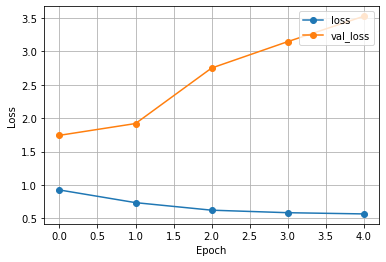

In [92]:
plt.plot(lstm.history['loss'], label='loss', marker = 'o')
plt.plot(lstm.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

## FastText

In [14]:
# now sequence must be 300 to fit with fastText
max_features = len(text1)+2
sequence_length = 150


def custom_slpit(input_data):
    return tf.strings.split(input_data)

vectorize_layer = TextVectorization(
    max_tokens=max_features,
    vocabulary = text1,
    output_mode="int",
    ngrams = None,
    output_sequence_length=sequence_length,
)
#commented because we passed a vocabulary
#vectorize_layer.adapt(x_train)

In [15]:
X_train_p = vectorize_layer(x_train_p)
X_test_p = vectorize_layer(x_test_p)
X_train_h = vectorize_layer(x_train_h)
X_test_h = vectorize_layer(x_test_h)

In [16]:
X_train = np.hstack((X_train_p,X_train_h))
X_test = np.hstack((X_test_p,X_test_h))

In [17]:
X_train.shape

(4809, 300)

In [18]:
# Convert y to OHE 
y_train = to_categorical(y_train, 3)
y_test  = to_categorical(y_test, 3)

In [137]:
!unzip -q crawl-300d-2M.vec.zip

In [19]:
embeddings_index = {}
with open('crawl-300d-2M.vec', encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 1999996 word vectors.


In [20]:
voc = vectorize_layer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [21]:
num_tokens = len(voc) + 2
embedding_dim = 300
hits = 0
misses = 0
words_not_found = []

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
        words_not_found.append(word)
print("Converted %d words (%d misses)" % (hits, misses))

Converted 10517 words (350 misses)


In [22]:
words_not_found

['',
 '[UNK]',
 'camees',
 'nepdg',
 'thirasia',
 'lusadas',
 'dinard',
 'monumentalprotection',
 'castanheiro',
 'ptolemies',
 'rosenblatt',
 'tarpley',
 'keizo',
 'selimiye',
 'recultivate',
 'kulesi',
 'richelieu',
 'larut',
 'adrin',
 'pmsd',
 'bossi',
 'jhora',
 'freiras',
 'morant',
 'workshared',
 'dunnes',
 'hcfa',
 'crotoy',
 'marlenheim',
 'tsim',
 'burnsian',
 'afterthefact',
 'huguenots',
 'michiko',
 'smegal',
 'nahariya',
 'palestrina',
 'ptolomies',
 'corstorphine',
 'madeirans',
 'jamus',
 'tramuntana',
 'frankenheimer',
 'dubbawya',
 'fwi',
 'krewski',
 'meriwether',
 'esquivel',
 'loyala',
 'langmuir',
 'tarare',
 'crose',
 'czesiek',
 'bicurei',
 'wanniski',
 'nonproselytizing',
 'wachter',
 'tadminster',
 'missenhardt',
 'aila',
 'mailstreams',
 'reigninh',
 'shuger',
 'vrenna',
 'federalinformationsystemcontrolsauditmanualis',
 'lambros',
 'formentor',
 'eisner',
 'ssaturday',
 'zmuda',
 'trianon',
 'chowpatty',
 'patlecan',
 'ofrequired',
 'ahkenaten',
 'pippens',

In [23]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [24]:
input = keras.Input(shape=(embedding_dim,), dtype="int64")
embedded_sequences = embedding_layer(input)
x = Conv1D(128, 3, activation="relu")(embedded_sequences)
x = GlobalMaxPooling1D()(x)
#x = Conv1D(128, 3, activation="relu")(x)
#x = GlobalMaxPooling1D()(x)
#x = Conv1D(128, 3, activation="relu")(x)
#x = GlobalMaxPooling1D()(x)
x = Dense(3, activation="softmax")(x)

m = Model(inputs=input, outputs=x)
m.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

c = m.fit(X_train, y_train, epochs=5,validation_split=0.2)

Epoch 1/5
121/121 [==============================] - 6s 47ms/step - loss: 1.1328 - accuracy: 0.3179 - val_loss: 1.1307 - val_accuracy: 0.3264
Epoch 2/5
121/121 [==============================] - 6s 46ms/step - loss: 0.9554 - accuracy: 0.5841 - val_loss: 1.1599 - val_accuracy: 0.3181
Epoch 3/5
121/121 [==============================] - 6s 46ms/step - loss: 0.8416 - accuracy: 0.6639 - val_loss: 1.2242 - val_accuracy: 0.3274
Epoch 4/5
121/121 [==============================] - 6s 47ms/step - loss: 0.7345 - accuracy: 0.7315 - val_loss: 1.2920 - val_accuracy: 0.3150
Epoch 5/5
121/121 [==============================] - 6s 46ms/step - loss: 0.6164 - accuracy: 0.8082 - val_loss: 1.3226 - val_accuracy: 0.3160


In [25]:
pr = np.round(m.predict(X_test))

65/65 [==============================] - 1s 14ms/step


In [26]:
print('Accuracy %s' % accuracy_score(y_test, pr))
print('F1-score %s' % f1_score(y_test, pr, average=None, zero_division = 1))
print('Classification report:')
print(classification_report(y_test,pr,zero_division = 1))

Accuracy 0.16642406598738477
F1-score [0.20754717 0.11848825 0.28178694]
Classification report:
              precision    recall  f1-score   support

           0       0.26      0.17      0.21       703
           1       0.19      0.09      0.12       667
           2       0.35      0.24      0.28       691

   micro avg       0.27      0.17      0.21      2061
   macro avg       0.26      0.17      0.20      2061
weighted avg       0.27      0.17      0.20      2061
 samples avg       0.56      0.17      0.17      2061



In [27]:
input = Input(shape=(embedding_dim,), dtype="int64") 
x   =  embedding_layer(input)
#x   =  Dropout(0.2)(x)
x   =  Conv1D(100, 3, padding='valid',activation='relu', strides=1)(x)
x   =  GlobalMaxPooling1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(32, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

m1 = Model(inputs=input, outputs=x)
m1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
c1 = m1.fit(X_train, y_train, epochs=5,validation_split=0.2)

Epoch 1/5
121/121 [==============================] - 6s 45ms/step - loss: 1.1126 - accuracy: 0.3345 - val_loss: 1.0984 - val_accuracy: 0.3586
Epoch 2/5
121/121 [==============================] - 5s 40ms/step - loss: 1.0946 - accuracy: 0.3694 - val_loss: 1.1002 - val_accuracy: 0.3150
Epoch 3/5
121/121 [==============================] - 5s 40ms/step - loss: 1.0550 - accuracy: 0.4297 - val_loss: 1.1283 - val_accuracy: 0.3264
Epoch 4/5
121/121 [==============================] - 5s 39ms/step - loss: 0.9868 - accuracy: 0.5173 - val_loss: 1.1606 - val_accuracy: 0.3306
Epoch 5/5
121/121 [==============================] - 5s 39ms/step - loss: 0.8662 - accuracy: 0.6054 - val_loss: 1.2906 - val_accuracy: 0.3420


In [28]:
pr1 = np.round(m1.predict(X_test))

65/65 [==============================] - 1s 12ms/step


In [29]:
print('Accuracy %s' % accuracy_score(y_test, pr1))
print('F1-score %s' % f1_score(y_test, pr1, average=None, zero_division = 1))
print('Classification report:')
print(classification_report(y_test,pr1,zero_division = 1))

Accuracy 0.18680252304706454
F1-score [0.25671141 0.2503962  0.17370892]
Classification report:
              precision    recall  f1-score   support

           0       0.31      0.22      0.26       703
           1       0.27      0.24      0.25       667
           2       0.46      0.11      0.17       691

   micro avg       0.31      0.19      0.23      2061
   macro avg       0.35      0.19      0.23      2061
weighted avg       0.35      0.19      0.23      2061
 samples avg       0.58      0.19      0.19      2061



### lstm

In [33]:
int_sequences_input = keras.Input(shape=(embedding_dim,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x   =  LSTM(100, return_sequences=True,name='lstm_layer')(embedded_sequences)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)
lstm_model = Model(inputs=int_sequences_input, outputs=x)
lstm_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
lstm = lstm_model.fit(X_train, y_train, epochs=5,validation_split=0.2)

Epoch 1/5
121/121 [==============================] - 26s 200ms/step - loss: 1.1014 - accuracy: 0.3400 - val_loss: 1.0944 - val_accuracy: 0.3680
Epoch 2/5
121/121 [==============================] - 22s 184ms/step - loss: 1.0798 - accuracy: 0.4006 - val_loss: 1.0708 - val_accuracy: 0.4116
Epoch 3/5
121/121 [==============================] - 23s 186ms/step - loss: 1.0283 - accuracy: 0.4858 - val_loss: 1.0593 - val_accuracy: 0.4220
Epoch 4/5
121/121 [==============================] - 22s 186ms/step - loss: 0.9709 - accuracy: 0.5334 - val_loss: 1.0518 - val_accuracy: 0.4356
Epoch 5/5
121/121 [==============================] - 23s 189ms/step - loss: 0.8810 - accuracy: 0.6036 - val_loss: 1.1224 - val_accuracy: 0.4137


In [34]:
lstm_pred = np.round(lstm_model.predict(X_test))

65/65 [==============================] - 5s 63ms/step


In [35]:
print('Accuracy %s' % accuracy_score(y_test, lstm_pred))
print('F1-score %s' % f1_score(y_test, lstm_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm_pred))

Accuracy 0.21057738961669092
F1-score [0.22042467 0.07088608 0.45343511]
Classification report:
              precision    recall  f1-score   support

           0       0.38      0.16      0.22       703
           1       0.23      0.04      0.07       667
           2       0.48      0.43      0.45       691

   micro avg       0.42      0.21      0.28      2061
   macro avg       0.36      0.21      0.25      2061
weighted avg       0.36      0.21      0.25      2061
 samples avg       0.21      0.21      0.21      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
inputs = Input(shape=(embedding_dim,))
# Embed each integer in a 128-dimensional vector
x = embedding_layer(inputs)
# Add 2 bidirectional LSTMs
x = Bidirectional(LSTM(100, return_sequences=True))(x)
x = Bidirectional(LSTM(64))(x)
#x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
# Add a classifier
x = layers.Dense(3, activation="softmax")(x)
model2 = keras.Model(inputs, outputs=x)
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
lstm2 = model2.fit(X_train, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
121/121 [==============================] - 105s 812ms/step - loss: 1.1016 - accuracy: 0.3387 - val_loss: 1.0982 - val_accuracy: 0.3680
Epoch 2/10
121/121 [==============================] - 82s 678ms/step - loss: 1.0983 - accuracy: 0.3408 - val_loss: 1.0996 - val_accuracy: 0.3649
Epoch 3/10
121/121 [==============================] - 81s 674ms/step - loss: 1.0956 - accuracy: 0.3585 - val_loss: 1.1022 - val_accuracy: 0.3628
Epoch 4/10
121/121 [==============================] - 92s 763ms/step - loss: 1.0889 - accuracy: 0.3811 - val_loss: 1.1215 - val_accuracy: 0.3191
Epoch 5/10
121/121 [==============================] - 88s 727ms/step - loss: 1.0791 - accuracy: 0.4047 - val_loss: 1.1282 - val_accuracy: 0.2703
Epoch 6/10
121/121 [==============================] - 86s 712ms/step - loss: 1.0638 - accuracy: 0.4203 - val_loss: 1.1572 - val_accuracy: 0.2723
Epoch 7/10
121/121 [==============================] - 90s 740ms/step - loss: 1.0342 - accuracy: 0.4474 - val_loss: 1.1996 - val_a

In [37]:
pred = np.round(model2.predict(X_test))

65/65 [==============================] - 14s 189ms/step


In [38]:
print('Accuracy %s' % accuracy_score(y_test, pred))
print('F1-score %s' % f1_score(y_test, pred, average=None))
print('Classification report:')
print(classification_report(y_test,pred))

Accuracy 0.07423580786026202
F1-score [0.16727941 0.0944206  0.042007  ]
Classification report:
              precision    recall  f1-score   support

           0       0.24      0.13      0.17       703
           1       0.17      0.07      0.09       667
           2       0.11      0.03      0.04       691

   micro avg       0.19      0.07      0.11      2061
   macro avg       0.17      0.07      0.10      2061
weighted avg       0.17      0.07      0.10      2061
 samples avg       0.07      0.07      0.07      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


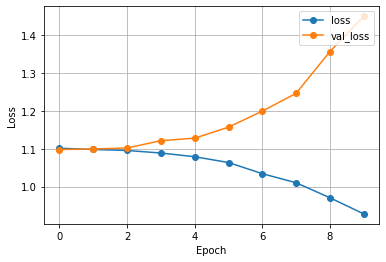

In [39]:
plt.plot(lstm2.history['loss'], label='loss', marker = 'o')
plt.plot(lstm2.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')